In [1]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('full_df.csv')

In [3]:
df

,Date,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29,0.007455,0.000029,83901,53777,-0.034259
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00,0.005057,0.000031,81415,50991,-0.014705
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00,0.004321,0.000031,76046,49316,0.014105
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28,0.006888,0.000028,90315,56969,-0.054024
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00,0.006479,0.000027,90881,57686,-0.028229
...,...,...,...,...,...,...,...,...,...,...,...,...
107,25-Nov-12,12.6,12.4,12.7,11.9,189370.0,0.01,0.007650,0.000003,1209759,676350,-0.031663
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07,0.008245,0.000003,1051403,583087,-0.024736
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01,0.008665,0.000004,877302,486018,-0.028629
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01,0.009038,0.000004,932686,508916,-0.029427


In [4]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)

In [5]:
Y = df["Close"]
X = df.drop(["Close"],axis=1)

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
trainX = np.array(X_train)
testX = np.array(X_test)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
look_back = 10

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=85, batch_size=1, verbose=2)

Epoch 1/85
75/75 - 0s - loss: 68.7101
Epoch 2/85
75/75 - 0s - loss: 64.7977
Epoch 3/85
75/75 - 0s - loss: 61.0097
Epoch 4/85
75/75 - 0s - loss: 56.8833
Epoch 5/85
75/75 - 0s - loss: 52.2420
Epoch 6/85
75/75 - 0s - loss: 47.2823
Epoch 7/85
75/75 - 0s - loss: 42.4329
Epoch 8/85
75/75 - 0s - loss: 38.0244
Epoch 9/85
75/75 - 0s - loss: 34.2651
Epoch 10/85
75/75 - 0s - loss: 31.2846
Epoch 11/85
75/75 - 0s - loss: 28.8609
Epoch 12/85
75/75 - 0s - loss: 26.8975
Epoch 13/85
75/75 - 0s - loss: 25.3008
Epoch 14/85
75/75 - 0s - loss: 23.8818
Epoch 15/85
75/75 - 0s - loss: 22.6675
Epoch 16/85
75/75 - 0s - loss: 21.5785
Epoch 17/85
75/75 - 0s - loss: 20.5715
Epoch 18/85
75/75 - 0s - loss: 19.6643
Epoch 19/85
75/75 - 0s - loss: 18.7883
Epoch 20/85
75/75 - 0s - loss: 17.9750
Epoch 21/85
75/75 - 0s - loss: 17.2383
Epoch 22/85
75/75 - 0s - loss: 16.5581
Epoch 23/85
75/75 - 0s - loss: 15.9174
Epoch 24/85
75/75 - 0s - loss: 15.3532
Epoch 25/85
75/75 - 0s - loss: 14.8444
Epoch 26/85
75/75 - 0s - loss: 14.

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.47 RMSE
Test Score: 1.33 RMSE


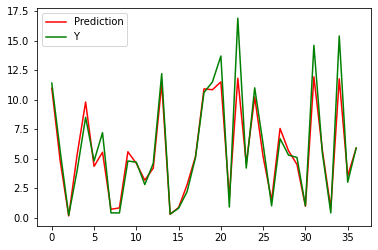

In [13]:
plt.plot(np.arange(37),testPredict, c="r",label="Prediction")
plt.plot(np.arange(37),y_test, c="g", label="Y")
plt.legend()
plt.show()

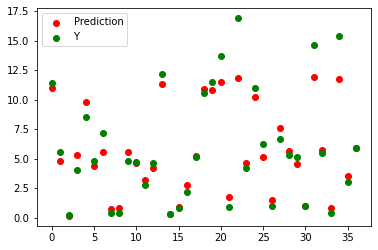

In [14]:
plt.scatter(np.arange(37),testPredict, c="r",label="Prediction")
plt.scatter(np.arange(37),y_test, c="g",label="Y")
plt.legend()
plt.show()

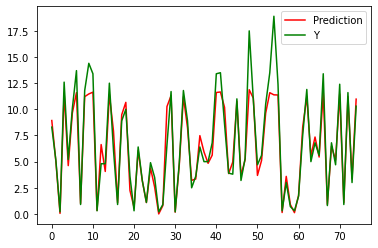

In [15]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

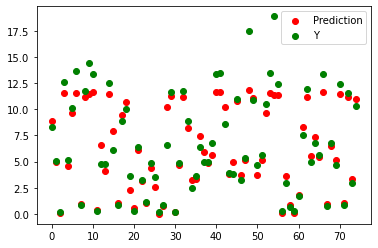

In [16]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [17]:
df = pd.read_csv('price_informations.csv')[:112]

In [18]:
df

,Date,Close,Open,High,Low,Vol,Change %
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00
...,...,...,...,...,...,...,...
107,25-Nov-12,12.6,12.4,12.7,11.9,189370.0,0.01
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01


In [19]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)
Y = df["Close"]
X = df.drop(["Close"],axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
trainX = np.array(X_train)
testX = np.array(X_test)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
look_back = 5

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=85, batch_size=1, verbose=2)

Epoch 1/85
75/75 - 0s - loss: 67.8121
Epoch 2/85
75/75 - 0s - loss: 65.5986
Epoch 3/85
75/75 - 0s - loss: 63.3856
Epoch 4/85
75/75 - 0s - loss: 60.6633
Epoch 5/85
75/75 - 0s - loss: 57.1031
Epoch 6/85
75/75 - 0s - loss: 52.8195
Epoch 7/85
75/75 - 0s - loss: 48.3554
Epoch 8/85
75/75 - 0s - loss: 44.1643
Epoch 9/85
75/75 - 0s - loss: 40.2972
Epoch 10/85
75/75 - 0s - loss: 36.7534
Epoch 11/85
75/75 - 0s - loss: 33.6068
Epoch 12/85
75/75 - 0s - loss: 30.8639
Epoch 13/85
75/75 - 0s - loss: 28.5808
Epoch 14/85
75/75 - 0s - loss: 26.6523
Epoch 15/85
75/75 - 0s - loss: 25.0341
Epoch 16/85
75/75 - 0s - loss: 23.6560
Epoch 17/85
75/75 - 0s - loss: 22.4846
Epoch 18/85
75/75 - 0s - loss: 21.4686
Epoch 19/85
75/75 - 0s - loss: 20.5663
Epoch 20/85
75/75 - 0s - loss: 19.7519
Epoch 21/85
75/75 - 0s - loss: 19.0084
Epoch 22/85
75/75 - 0s - loss: 18.3253
Epoch 23/85
75/75 - 0s - loss: 17.6774
Epoch 24/85
75/75 - 0s - loss: 17.0552
Epoch 25/85
75/75 - 0s - loss: 16.4535
Epoch 26/85
75/75 - 0s - loss: 15.

In [20]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.52 RMSE
Test Score: 1.34 RMSE


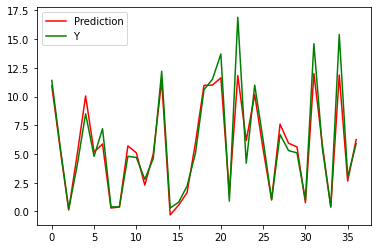

In [22]:
plt.plot(np.arange(testPredict.shape[0]),testPredict, c="r",label="Prediction")
plt.plot(np.arange(testPredict.shape[0]),y_test, c="g", label="Y")
plt.legend()
plt.show()

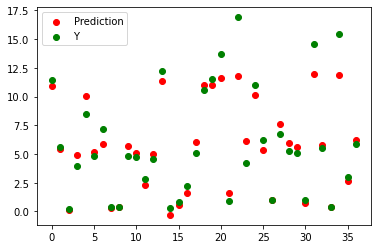

In [23]:
plt.scatter(np.arange(testPredict.shape[0]),testPredict, c="r",label="Prediction")
plt.scatter(np.arange(testPredict.shape[0]),y_test, c="g",label="Y")
plt.legend()
plt.show()

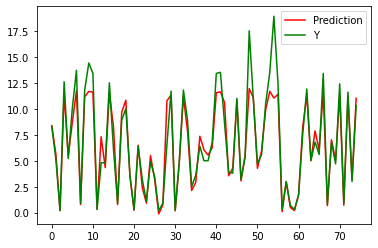

In [24]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

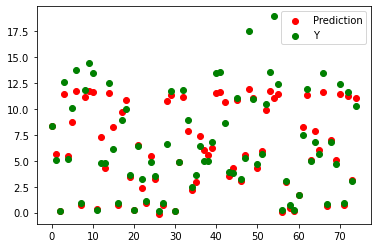

In [25]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()